In [2]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

ModuleNotFoundError: No module named 'statsmodels'

# Exercise 1

In [ ]:
np.random.seed(0)
n = 10000
mu_a, sig_a = 0, 1
mu_b, sig_b = 0, 2
a = np.random.normal(mu_a, sig_a, n)
b = np.random.normal(mu_b, sig_b, n)
x = a + 4 * b
y = 2 * a + b

In [ ]:
var_a, var_b = sig_a ** 2, sig_b ** 2

mu_x = mu_a + 4 * mu_b
mu_y = 2 * mu_a + mu_b
var_x = var_a + 16 * var_b
var_y = 4 * var_a + var_b
sig_x = np.sqrt(var_x)
sig_y = np.sqrt(var_y)
cor_xy = (2 * var_a + 4 * var_b) / (sig_x * sig_y)


print(f'Analytically:')
print(f'Var(X) = {var_x}, std(X) = {sig_x: .4f}')
print(f'Var(Y) = {var_y}, std(Y) = {sig_y: .4f}')
print(f'Cor(X, Y) = {cor_xy: .4f}')

Analytically:
Var(X) = 65, std(X) =  8.0623
Var(Y) = 8, std(Y) =  2.8284
Cor(X, Y) =  0.7894


In [ ]:
covxy = np.sum((x - np.mean(x)) * (y - np.mean(y))) / (len(x) - 1)
vx = np.sum((x - np.mean(x)) ** 2) / (len(x) - 1)
vy = np.sum((y - np.mean(y)) ** 2) / (len(y) - 1)
stdx = np.sqrt(vx)
stdy = np.sqrt(vy)
cor = covxy / (stdx * stdy)

print(f'Empirically (on {n} realizations of X and Y):')
print(f'Var(X) = {vx:.4f}, std(X) = {stdx:.4f}')
print(f'Var(Y) = {vy:.4f}, std(Y) = {stdy:.4f}')
print(f'Cov(X, Y) = {covxy:.4f}')
print(f'Cor(X, Y) = {cor:.4f}')

Empirically (on 10000 realizations of X and Y):
Var(X) = 63.9740, std(X) = 7.9984
Var(Y) = 7.7856, std(Y) = 2.7903
Cov(X, Y) = 17.5938
Cor(X, Y) = 0.7883


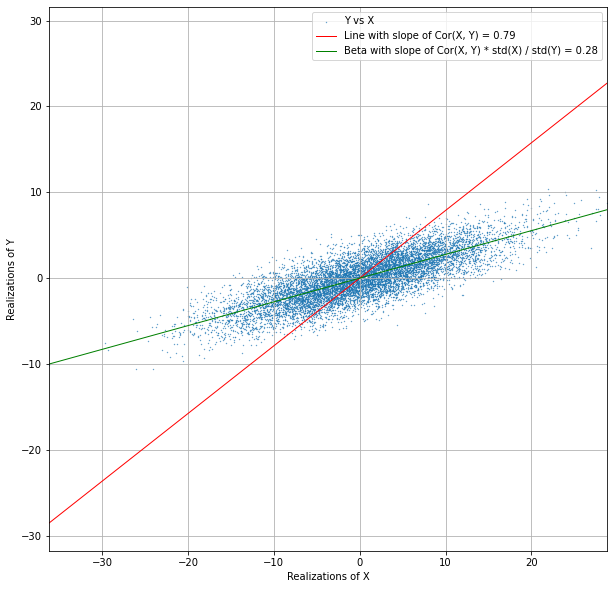

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
ax.axis('equal')
ax.grid('on')
ax.set(xlabel='Realizations of X', ylabel='Realizations of Y', xlim=(x.min(), x.max()), ylim=(y.min(), y.max()))
ax.scatter(x, y, s=0.1, label='Y vs X')
l = np.linspace(-100, 100, 1000)
line, = ax.plot(l, cor * l)
line.set(color='red', linewidth=1, label=f'Line with slope of Cor(X, Y) = {cor:.2f}')
beta = cor * np.sqrt(var_y) / np.sqrt(var_x)
line, = ax.plot(l, l * beta)
line.set(color='green', linewidth=1, label=f'Beta with slope of Cor(X, Y) * std(X) / std(Y) = {beta:.2f}')
ax.legend()
plt.show()

$\beta =  \frac{\sum_{i=1}^n(x_i - \bar{x_i})(y_i - \bar{y_i})}{\sum_{i=1}^n (x_i - \bar{x_i})^2 }$, by deriving $\sum_{i=1}^n (y_i - \alpha - \beta x_i)^2$

# Exercise 2

In [ ]:
def generate_hidden_sine(period, n, std_noise=1):
    return np.sin(2 * np.pi * np.arange(n) / period) + np.random.normal(0, std_noise, n)

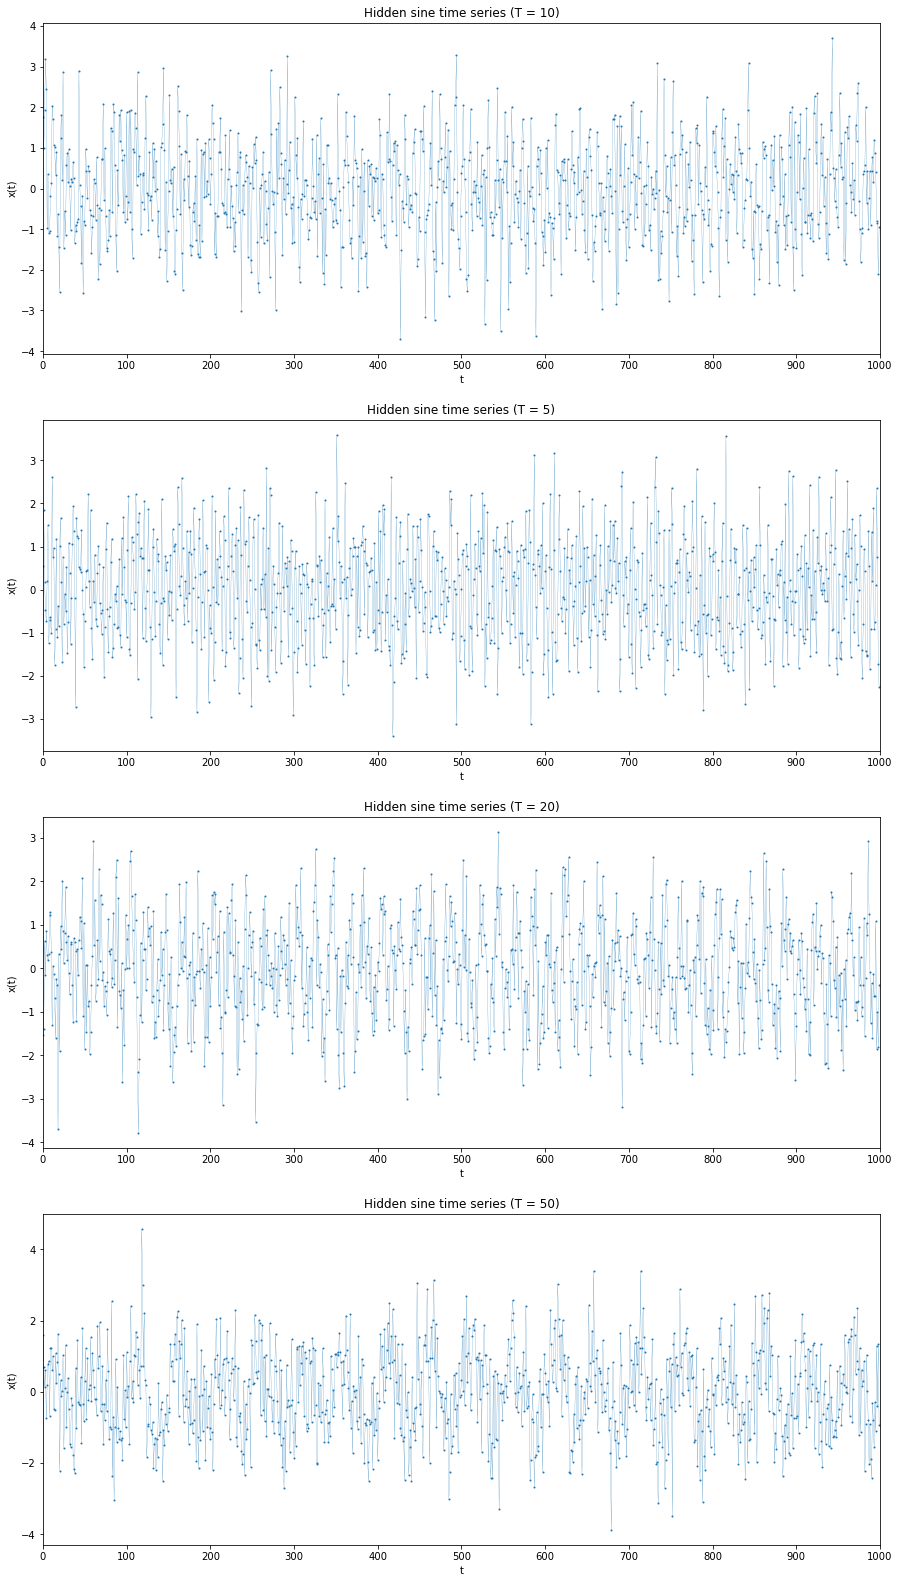

In [ ]:
np.random.seed(0)
n = 1000
periods = [10, 5, 20, 50]

x = {T: generate_hidden_sine(period=T, n=n) for T in periods}

fig, axes = plt.subplots(ncols=1, nrows=len(periods), figsize=(15, 7 * len(periods)))
for i, T in enumerate(periods):
    ax = axes[i]
    ax.set(xlim=(0, n), xlabel='t', ylabel='x(t)', title=f'Hidden sine time series (T = {T})', xticks=np.arange(0, n + 1, 100))
    line, = ax.plot(x[T])
    line.set(linewidth=0.2, marker='o', markersize=1)
plt.show()

In [ ]:
def acf(x, lag): # tau = lag
    assert x.ndim == 1
    mu, sig = x.mean(), x.std()
    x_ = x[:-lag] if lag > 0 else x # X_t 
    x_shifted = x[lag:] # X_{t+tau} 
    return np.mean((x_ - mu) * (x_shifted - mu)) / sig ** 2 #X_t and X_{t+lag} are uncorrelated if the ACF is 0

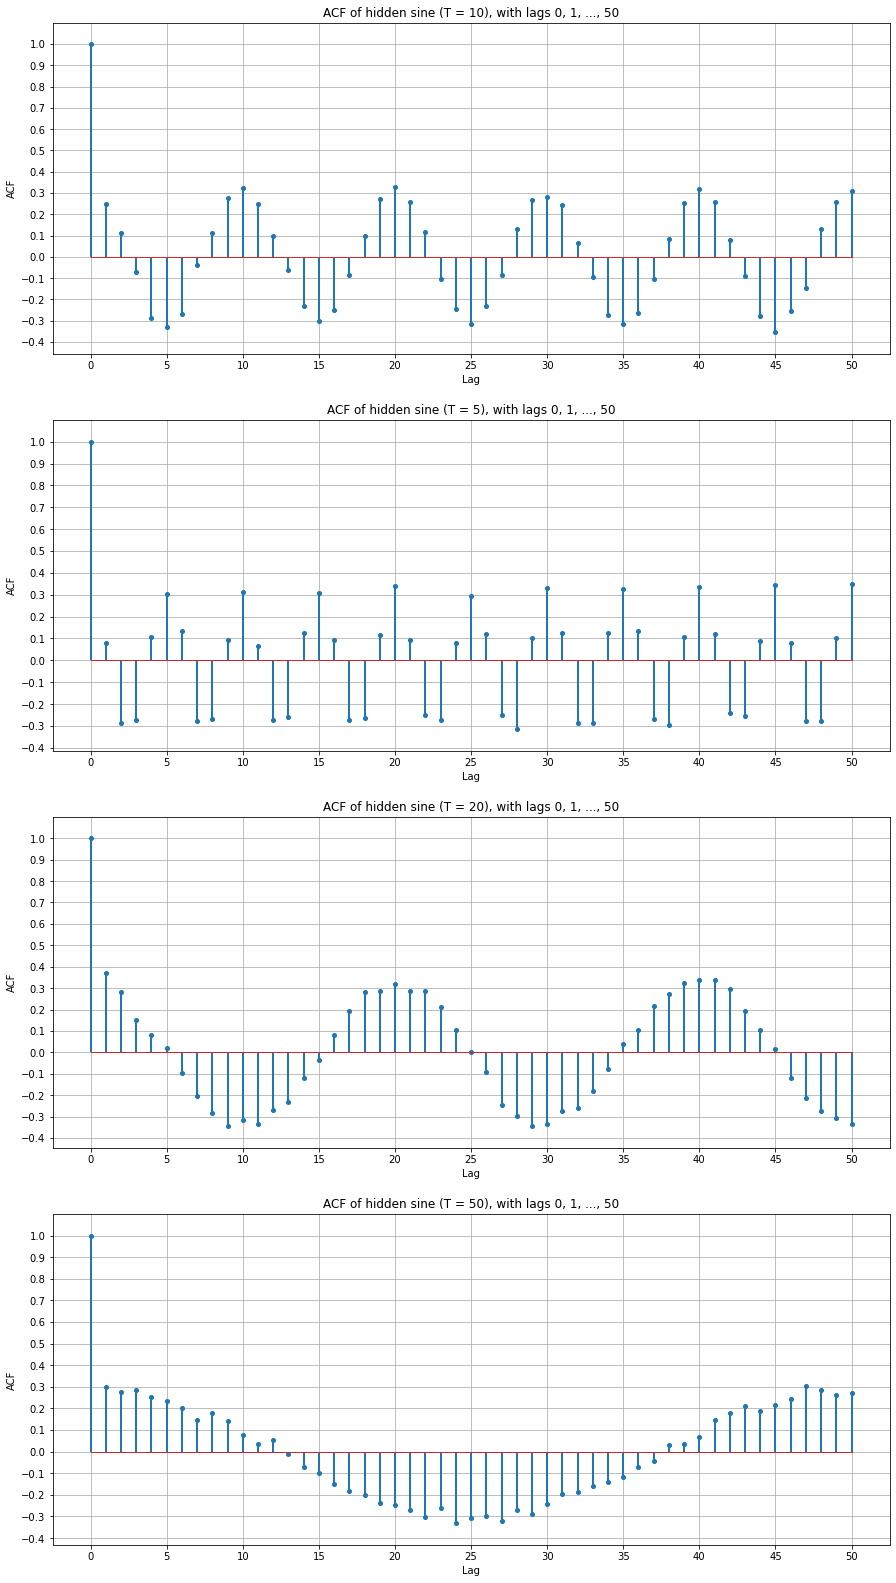

In [ ]:
nlags = 50

fig, axes = plt.subplots(ncols=1, nrows=len(periods), figsize=(15, 7 * len(periods)))
for i, T in enumerate(periods):
    acfs = [acf(x[T], lag) for lag in range(nlags + 1)]
    ax = axes[i]
    ax.grid('on')
    ax.set(xlabel='Lag', ylabel='ACF', title=f'ACF of hidden sine (T = {T}), with lags 0, 1, ..., {nlags}',
           xticks=np.arange(0, nlags + 1, 5), yticks=np.arange(-1.1, 1.1, 0.1),
           ylim=(min(acfs) - 0.1, max(acfs) + 0.1))
    markerline, stemlines, baseline = ax.stem(acfs)
    markerline.set(color='tab:blue', marker='o', markersize=4)
    stemlines.set(color='tab:blue', linewidth=2)
    baseline.set(color='tab:red', linewidth=1)

plt.show()

# Exercise 3

In [ ]:
data = np.loadtxt('eur_usd.txt')
days = [datetime.fromtimestamp(x).strftime('%b %d') for x in data[:, 0]]
price_ts = data[:, 1]

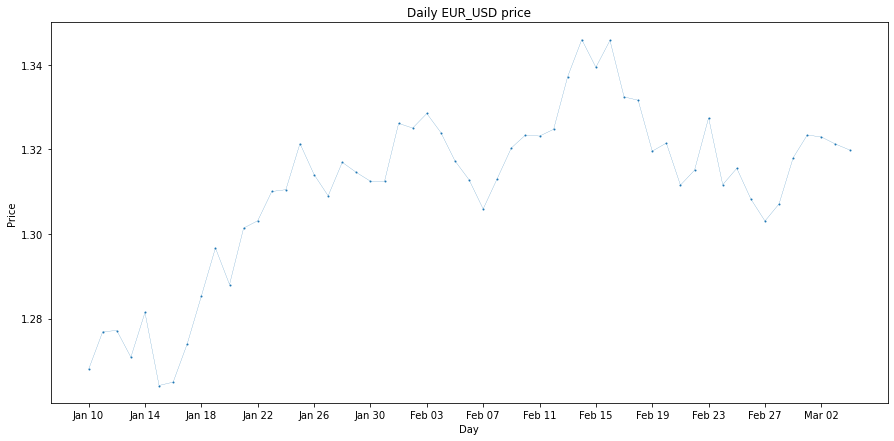

In [ ]:
ticks = np.arange(0, len(days), 4)
ticks_labels = np.take(days, ticks)

fig = plt.figure(figsize=(15, 7))
ax = plt.gca()
ax.set(xlabel='Day', ylabel='Price', title=f'Daily EUR_USD price')
line, = ax.plot(price_ts)
line.set(linewidth=0.2, marker='o', markersize=1)
plt.xticks(ticks=ticks, labels=ticks_labels)
plt.show()

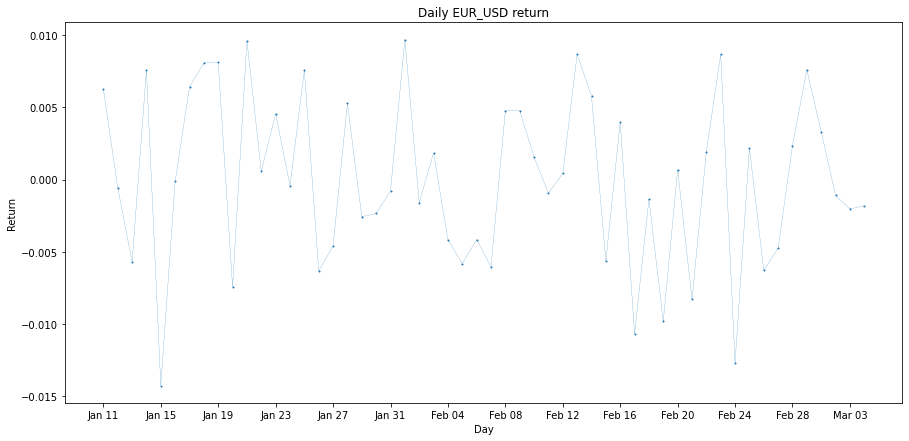

In [ ]:
return_ts = (price_ts[1:] - price_ts[:-1]) / price_ts[:-1]
return_ts = return_ts - return_ts.mean()

ticks = np.arange(0, len(days), 4)
ticks_labels = np.take(days, ticks + 1)

fig = plt.figure(figsize=(15, 7))
ax = plt.gca()
ax.set(xlabel='Day', ylabel='Return', title=f'Daily EUR_USD return')
line, = ax.plot(return_ts)
line.set(linewidth=0.2, marker='o', markersize=1)
plt.xticks(ticks=ticks, labels=ticks_labels)
plt.show()

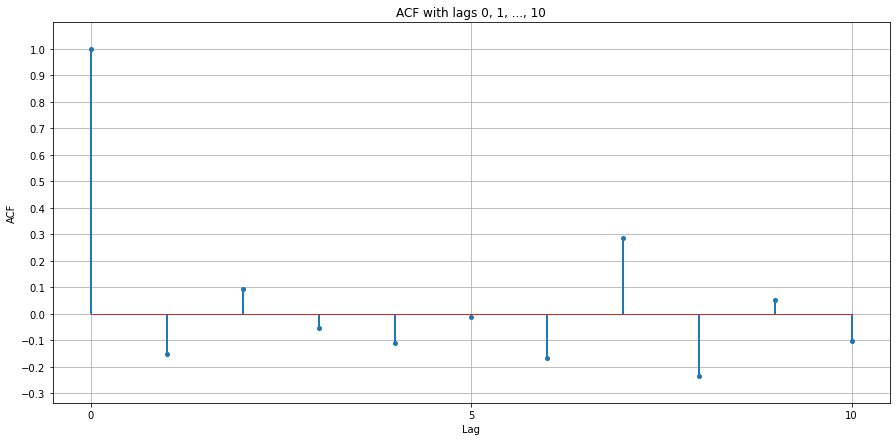

In [ ]:
nlags = 10
acfs = [acf(return_ts, lag) for lag in range(nlags + 1)]

fig = plt.figure(figsize=(15, 7))
ax = plt.gca()
ax.grid('on')
ax.set(xlabel='Lag', ylabel='ACF', title=f'ACF with lags 0, 1, ..., {nlags}',
       xticks=np.arange(0, nlags + 1, 5), yticks=np.arange(-1.1, 1.1, 0.1),
       ylim=(min(acfs) - 0.1, max(acfs) + 0.1))
markerline, stemlines, baseline = ax.stem(acfs)
markerline.set(color='tab:blue', marker='o', markersize=4)
stemlines.set(color='tab:blue', linewidth=2)
baseline.set(color='tab:red', linewidth=1)

plt.show()

In [ ]:
# Our analytical model
a1 = acf(return_ts, 1) # a1 = rho_1, return_ts = X_t and 1 = tau i.e. {X_t+tau}
predictions_ar1 = np.zeros_like(return_ts) * np.nan
predictions_ar1[1:] = a1 * return_ts[:-1] 
# Statsmodels AR(p) 
predictions_ar_models = {p: AutoReg(return_ts, lags=p).fit().predict(start=0) for p in [1, 10, 26]}

In [ ]:
a1

-0.15285237988218942

NOISE IS ALREADY INCLUDED IN RETURNS


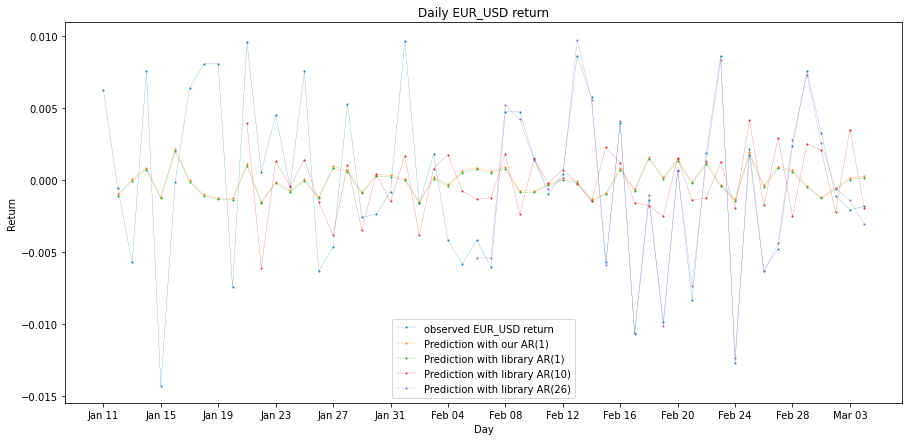

In [ ]:
ticks = np.arange(0, len(days), 4)
ticks_labels = np.take(days, ticks + 1)

fig = plt.figure(figsize=(15, 7))
ax = plt.gca()

ax.set(xlabel='Day', ylabel='Return', title=f'Daily EUR_USD return')

line, = ax.plot(return_ts)
line.set(linewidth=0.2, marker='o', markersize=1, label='observed EUR_USD return')

line, = ax.plot(predictions_ar1)                
line.set(linewidth=0.2, marker='o', markersize=1, label='Prediction with our AR(1)')

for p, predictions in predictions_ar_models.items():
    line, = ax.plot(predictions)
    line.set(linewidth=0.2, marker='o', markersize=1, label=f'Prediction with library AR({p})')

plt.xticks(ticks=ticks, labels=ticks_labels)
ax.legend()
plt.show()

### LET'S EXPLICITELY ADD WHITE NOISE
TO SHOW THAT THE RESULTS ARE BETTER BEFORE BECAUSE IT WAS ALREADY INCLUDED IN RETURNS

In [ ]:
import numpy as np

# Assuming return_ts is your time series of returns

# Calculate autocorrelation at lag 1
a1 = acf(return_ts, 1)

# Generate random noise with the same length as the return time series
noise = np.random.normal(0, np.std(return_ts), len(return_ts))

# Use the autocorrelation coefficient and add noise to generate predictions
predictions_ar1_with_noise = np.zeros_like(return_ts) * np.nan
predictions_ar1_with_noise[1:] = a1 * return_ts[:-1] + noise[:-1]


NameError: name 'acf' is not defined

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

# Fit AR models with different numbers of lags and include noise
predictions_ar_models_with_noise = {}
for p in [1, 10, 26]:
    model = AutoReg(return_ts, lags=p).fit()
    noise = np.random.normal(0, np.std(model.resid), len(return_ts)) # we generate random noise with a mean of 0 and a standard deviation equal to the standard deviation of the residuals (model.resid) of the fitted model
    predictions_ar_models_with_noise[p] = model.predict(start=0) + noise


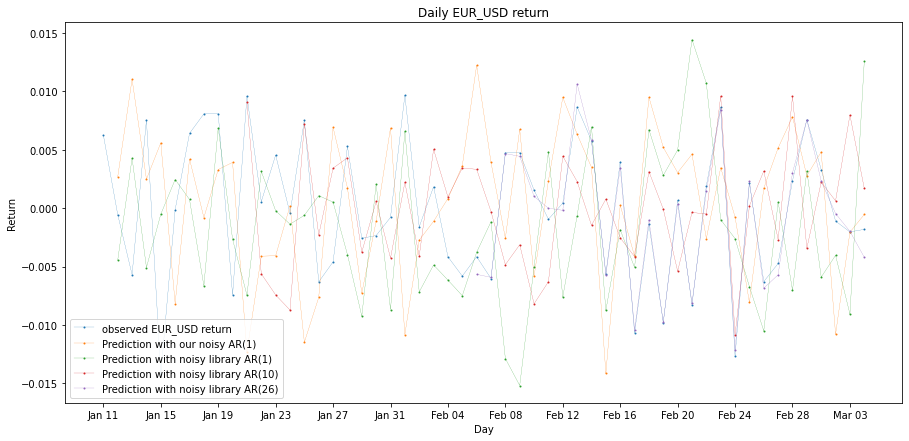

In [ ]:
ticks = np.arange(0, len(days), 4)
ticks_labels = np.take(days, ticks + 1)

fig = plt.figure(figsize=(15, 7))
ax = plt.gca()

ax.set(xlabel='Day', ylabel='Return', title=f'Daily EUR_USD return')

line, = ax.plot(return_ts)
line.set(linewidth=0.2, marker='o', markersize=1, label='observed EUR_USD return')

line, = ax.plot(predictions_ar1_with_noise)
line.set(linewidth=0.2, marker='o', markersize=1, label='Prediction with our noisy AR(1)')

for p, predictions in predictions_ar_models_with_noise.items():
    line, = ax.plot(predictions)
    line.set(linewidth=0.2, marker='o', markersize=1, label=f'Prediction with noisy library AR({p})')

plt.xticks(ticks=ticks, labels=ticks_labels)
ax.legend()
plt.show()

By explicitly including noise in the model, we can account for the variability in the data that is not captured by the autoregressive relationship. This approach can be useful when we want to simulate or analyze the behavior of the time series while considering the ***stochastic nature of the data***.